## Customer Segmentation Using Clustering

The objective of this notebook is to segment customers into distinct groups
based on their purchasing behavior using RFM features.

Since no target labels are available, unsupervised learning techniques are applied
to discover natural groupings within the data.


In [13]:
from pathlib import Path

FIGURES_PATH = Path("../reports/figures")
FIGURES_PATH.mkdir(parents=True, exist_ok=True)


In [8]:
import pandas as pd
rfm=pd.read_csv("../data/processed/rfm_features.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12747.0,2,11,3073.41
1,12748.0,1,203,26279.22
2,12749.0,4,5,4032.98
3,12820.0,3,4,923.62
4,12821.0,214,1,92.72


In [9]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3825.000000,3825.000000,3825.000000,3825.000000
mean,15560.726275,92.133856,4.051503,1169.564477
std,1572.037298,99.286178,6.662454,2240.842468
min,12747.000000,1.000000,1.000000,1.900000
25%,14210.000000,18.000000,1.000000,243.220000
50%,15569.000000,51.000000,2.000000,551.950000
75%,16907.000000,144.000000,4.000000,1293.350000
max,18287.000000,374.000000,203.000000,61295.620000


### Scale the RFM features

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm[["Recency","Frequency","Monetary"]])

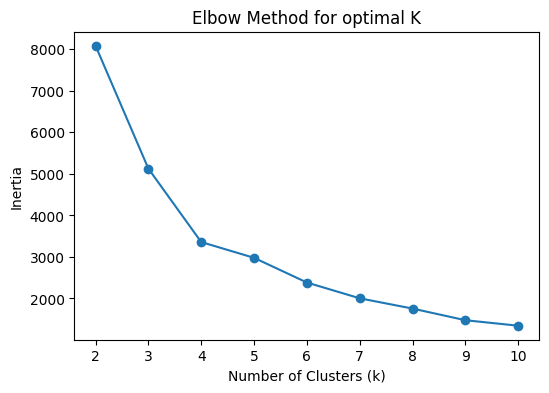

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia=[]

for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,11),inertia,marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for optimal K")
plt.savefig(FIGURES_PATH/"Elbow Function Graph.png",dpi=300,bbox_inches='tight')
plt.show()

## Silhouette Score (how tight the cluster are, how well they are separated)

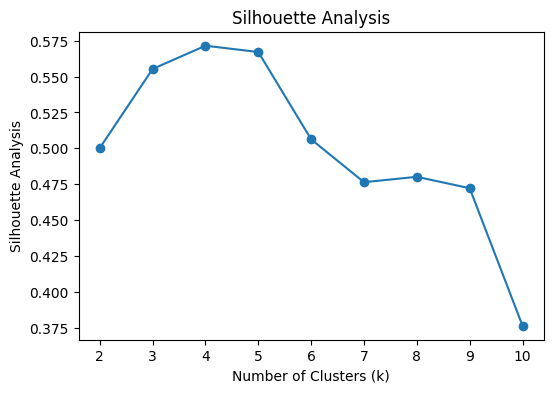

In [17]:
from sklearn.metrics import silhouette_score

sil_scores=[]

for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(rfm_scaled)
  sil_scores.append(silhouette_score(rfm_scaled,labels))

plt.figure(figsize=(6,4))
plt.plot(range(2,11),sil_scores,marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Analysis")
plt.title("Silhouette Analysis")
plt.savefig(FIGURES_PATH/"Silhoute_Score",dpi=300,bbox_inches='tight')
plt.show()

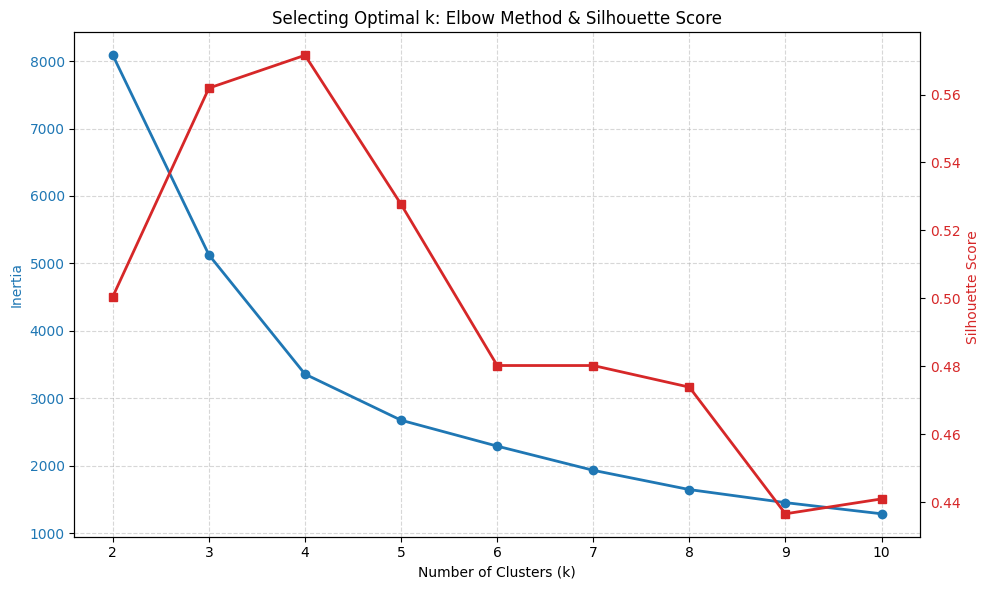

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, labels))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, inertia, marker='o', color=color, linewidth=2, label="Inertia")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Silhouette Score ', color=color)
ax2.plot(k_range, sil_scores, marker='s', color=color, linewidth=2, label="Silhouette")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Selecting Optimal k: Elbow Method & Silhouette Score')
fig.tight_layout()
plt.savefig(FIGURES_PATH/"k_selection.png",dpi=300,bbox_inches='tight')
plt.show()

In [23]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
rfm["Cluster"]=kmeans.fit_predict(rfm_scaled)

In [25]:
import joblib
joblib.dump(kmeans,"../models/kmeans_model.pkl")
rfm.to_csv('../data/processed/customer_segments.csv',index=False)

### Cluster Analysis

In [26]:
rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,244.571280,1.547347,368.045381
1,43.824189,3.363988,926.967772
2,2.857143,93.714286,32823.732857
3,14.654275,17.278810,5543.248290


KMeans clustering was applied to the scaled RFM features to segment customers
based on purchasing behavior.

The optimal number of clusters was selected using the Elbow Method and
Silhouette Score analysis. Each customer was assigned to a cluster.
